# Linear regression using gradient descent

Mar. 2020

In this notebook an implementation of the gradient descent algorithm is shown. That is applied in the linear regression approach.

In [1]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Univariate case

Assuming we have a set of data that can be fitted using a linear function $y = b + wx$. The goal is to find $b$ and $w$ that model the required function.

In [2]:
np.random.seed(5)
# Real values of b and w
b = 5
w = 0.1
# Parameters for simulation
n = 250
# Random data
x = np.linspace(0, 10, n)
y = b + w * x
# Introducing some noice in x
x = x + np.random.rand(n) - 0.5

Given $\hat{b}$ and $\hat{w}$ as estimations for $b$ and $w$, and $\hat{y} = \hat{b} + \hat{w}x$, we define a cost function:

$$C(\hat{b}, \hat{w}) = \frac{1}{n} \sum (\hat{y} - y)^2$$

We will approach to estimate values of $\hat{b}$ and $\hat{w}$ using the derivatives of $C$.

$$\frac{\partial C}{\partial b} = \frac{2}{n} \sum (\hat{w} x + \hat{b} - y)$$

$$\frac{\partial C}{\partial w} = \frac{2}{n} \sum x (\hat{w} x + \hat{b} - y)$$

Therefore, given a $\eta$ as the learing rate, $\hat{b}$ and $\hat{w}$ will be updated using:

$$\hat{b}_i = \hat{b}_{i - 1} - \frac{\eta}{n} \sum (\hat{w}_{i - 1} x + \hat{b}_{i - 1} - y)$$

$$\hat{w}_i = \hat{w}_{i - 1} - \frac{\eta}{n} \sum x(\hat{w}_{i - 1} x + \hat{b}_{i - 1} - y)$$

In [3]:
# Starting with random values for b and w
b_hat = np.random.rand()
w_hat = np.random.rand()

# Parameters
eta = 0.05
e = 1e-6
ones = np.ones(n)

i = 1
iterations = 1e4
while i < iterations:
    ## Getting the estimated value of y
    y_hat = w_hat * x + b_hat
    diff = y_hat - y
    ## Cost or error in the estimation
    cost = diff.dot(diff) / n
    ## Updating parameters
    b_upd = b_hat - eta / n * (w_hat * x + b_hat - y).dot(ones)
    w_upd = w_hat - eta * (w_hat * x + b_hat  - y).dot(x) / n
    ## Checking the bound error
    if abs(b_hat - b_upd) < e and abs(w_hat - w_upd) < e:
        break
    ## Preparing to next iteration
    w_hat = w_upd
    b_hat = b_upd
    i += 1

print('iterations : %d' % i)
print('w : %f' % w_hat)
print('b : %f' % b_hat)
print('cost: %f' % cost)

iterations : 879
w : 0.098969
b : 5.004854
cost: 0.000847


In [4]:
pd.DataFrame({'w': [w, w_hat], 'b': [b, b_hat]}, index=['Real values', 'Estimated values'])

,w,b
Real values,0.100000,5.000000
Estimated values,0.098969,5.004854


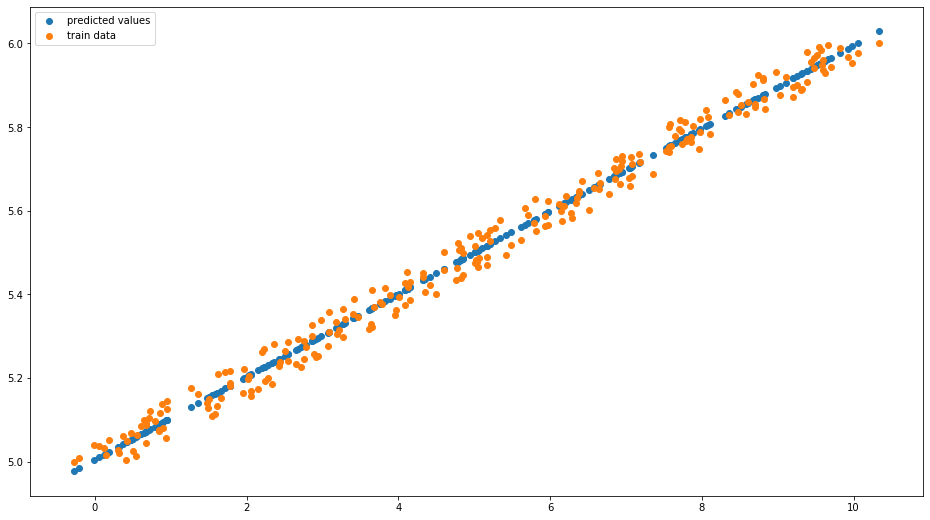

In [5]:
plt.figure(figsize=(16,9))
plt.scatter(x, x * w_hat + b_hat, label='predicted values')
plt.scatter(x, y, label='train data')
plt.legend()

## Multivariable case

The multivariable case is similar as the univariate case with the difference that we use vectors/matrices instead of scalars.

The linear function:

$$y = b + w_1 x_1 + w_2 x_2 + \dots + w_d x_d$$

$$\mathbf{y} = \mathbf{b + wx}$$

The cost function:

$$\mathbf{C(\hat{w}, \hat{b})} = \frac{1}{n} \mathbf{(\hat{w} x + \hat{b} - y)^T (\hat{w} x + \hat{b} - y)}$$

The derivatives:

$$\mathbf{\frac{\partial C}{\partial b}} = \frac{2}{n} \mathbf{1(w x + b - y)}$$

$$\mathbf{\frac{\partial C}{\partial w}} = \frac{2}{n} \mathbf{x(w x + b - y)}$$

The updating rules:

$$\mathbf{\hat{b}_i} = \mathbf{\hat{b}_{i - 1}} - \frac{\eta}{n} \mathbf{1(w x + b - y)}$$

$$\mathbf{\hat{w}_i} = \mathbf{\hat{w}_{i - 1}} - \frac{\eta}{n} \mathbf{x(w x + b - y)}$$

Generating pseudo-data:

In [27]:
np.random.seed(5)
# Number of variables
d = 5
# Number of examples
n = 250
x = np.linspace(0, 10, 250 * d).reshape(d, 250)
w = (np.random.rand(d) - 0.5) * 10
b = np.random.rand()
print('b : ', b)
print('w : ', w)

b :  0.6117438629026457
w :  [-2.78006829  3.70732306 -2.93280845  4.18610908 -0.11588811]


In [29]:
y = w.dot(x) + b
x = x + (np.random.rand(d, n) - 0.5) * 0.1

Implementation:

In [31]:
# Starting with random values for b and w
w_hat = np.random.rand(d)
b_hat = np.random.rand()

# Parameters
eta = 0.01
e = 1e-6
ones = np.ones(n)

i = 0
iterations = 1e5
while True:
    # Target estimated
    y_hat = b_hat + w_hat.dot(x)
    diff = y_hat - y
    cost = (diff * diff).sum() / n
    # Updating values of w and b
    b_upd = b_hat - eta / n * ones.dot(diff)
    w_upd = w_hat - eta / n * x.dot(diff)
    if cost < e or i == iterations:
        break
    b_hat = b_upd
    w_hat = w_upd
    i += 1
print('iterations : %d' % i)
print('w :', w_hat)
print('b : %f' % b_hat)
print('cost : %f' % cost)

iterations : 100000
w : [-2.76504702  3.69386923 -2.83309506  4.09863344 -0.12029328]
b : 0.801932
cost : 0.044041


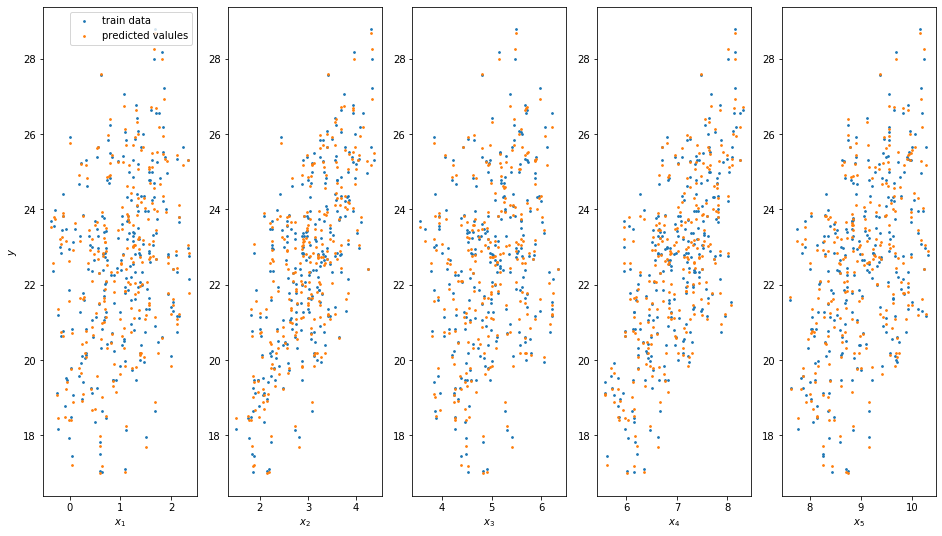

In [32]:
fig, ax = plt.subplots(ncols=d, nrows=1, figsize=(16, 9))
for i in range(d):
    ax[i].scatter(x[i], y, s=3, label='train data')
    ax[i].scatter(x[i], b_hat + w_hat.dot(x), s=3, label='predicted valules')
    ax[i].set_xlabel('$x_%d$' % (i + 1))
    if i == 0:
        ax[i].set_ylabel('$y$')
        ax[i].legend()

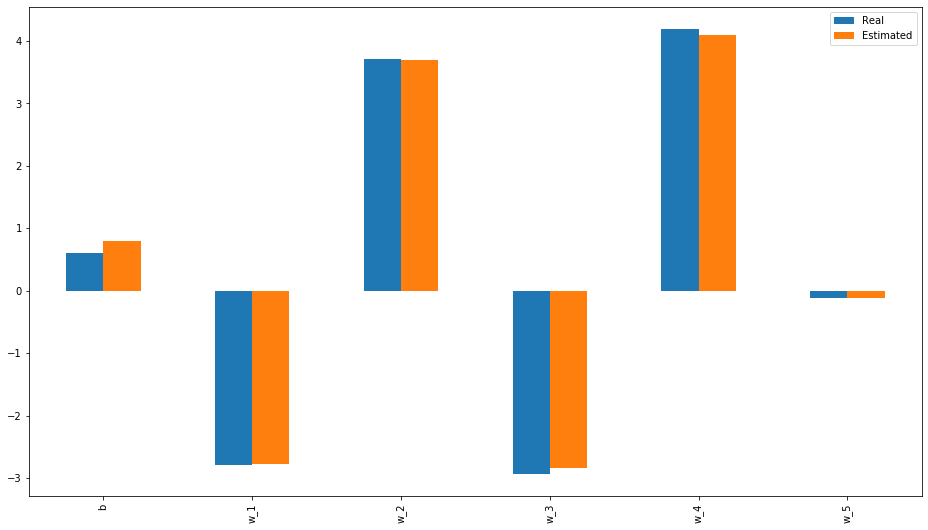

In [33]:
params = pd.concat([
    pd.DataFrame({'Real': [b], 'Estimated': [b_hat]}, index=['b']),
    pd.DataFrame({'Real': w, 'Estimated': w_hat}, index=['w_{}'.format(i + 1) for i in range(d)])
])
params.plot(kind='bar', figsize=(16, 9))

In [34]:
params

,Real,Estimated
b,0.611744,0.801932
w_1,-2.780068,-2.765047
w_2,3.707323,3.693869
w_3,-2.932808,-2.833095
w_4,4.186109,4.098633
w_5,-0.115888,-0.120293
